# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [5]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [6]:
def max_element(arr):
    # Your code here
    z = arr[1:][arr[:-1] == 0]
    if len(z) == 0:
        return None
    return np.max(z)
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [7]:
def nearest_value(X, v):
    # Your code here
    z = np.abs(X - v)
    i = np.argmin(z)
    return X.flat[i]
X = np.arange(0,10).reshape((2, 5)) 
v = 3.6
print(nearest_value(X, v))

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [8]:
def scale(X):
    # Your code here
     mean = np.mean(X, axis=0)
     std = np.std(X, axis=0)
     std[std == 0] = 1
     X_scaled = (X - mean) / std
     return X_scaled
X = np.random.randint(0, 10, size=(3, 4))
print(X)
print(scale(X))

[[1 3 5 8]
 [4 6 7 0]
 [4 8 3 9]]
[[-1.41421356 -1.29777137  0.          0.57932412]
 [ 0.70710678  0.16222142  1.22474487 -1.40693001]
 [ 0.70710678  1.13554995 -1.22474487  0.82760589]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [9]:
def get_stats(X):
    det = np.linalg.det(X) # определитель
    trace = np.trace(X) # след
    min_el = np.min(X) # наименьший и наибольший элементы
    max_el = np.max(X)
    norm = np.linalg.norm(X) # Фробениус
    eigvals = np.linalg.eigvals(X) # соб ч
    inv = np.linalg.inv(X) if np.linalg.det(X) != 0 else None
    
    return { 
        'det': det,
        'trace': trace,
        'min': min_el,
        'max': max_el,
        'norm': norm,
        'eigenvalues': eigvals,
        'inverse': inv
        }
np.random.seed(0)
X = np.random.normal(10, 1, size=(3, 3))
get_stats(X)

{'det': np.float64(0.7818319812364621),
 'trace': np.float64(33.528391484324075),
 'min': np.float64(9.02272212012359),
 'max': np.float64(12.240893199201459),
 'norm': np.float64(32.46572464904387),
 'eigenvalues': array([3.23834750e+01, 2.14904498e-02, 1.12342601e+00]),
 'inverse': array([[ 36.5667531 ,   6.6479615 , -46.62521112],
        [-28.58137887,  -4.85001924,  36.12769045],
        [-12.01616837,  -2.52907069,  15.73657777]])}

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
for exp_num in range(100):
    # Your code here
    max_values = [] 
    A = np.random.randn(10, 10)  
    B = np.random.randn(10, 10)  
    C = A @ B 
    max_values.append(np.max(C))

mean_val = np.mean(max_values)
q = np.quantile(max_values, 0.95)

print(mean_val)
print(q)

6.59075174126482
6.59075174126482


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [11]:
import pandas as pd


In [12]:
df = pd.read_csv("2008.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [13]:
# Your code here
counts = df["CancellationCode"].value_counts()
most_common = counts.idxmax()

most_common

'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [14]:
# Your code here
mean = df["Distance"].mean()
min = df["Distance"].min()
max = df["Distance"].max()
mean, min, max

(np.float64(724.5082571428571), np.int64(31), np.int64(4962))

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [15]:
# Your code here
min = df["Distance"].min()
min

np.int64(31)

In [16]:
min_flight = df[df["Distance"] == min]
print(min_flight[["Year", "Month", "DayofMonth", "FlightNum", "Distance"]])

       Year  Month  DayofMonth  FlightNum  Distance
1116   2008     12          30         65        31
6958   2008     12          26         65        31
17349  2008      8          18         64        31
27534  2008      3          11         64        31
46082  2008      8           9         65        31
48112  2008      2          28         64        31


In [17]:
flight_num = min_flight["FlightNum"].unique()
od = df[(df["FlightNum"].isin(flight_num)) & (df["Distance"] != min)]
print(od["Distance"])

501       533
1389      680
1517      680
2619     2381
3869       82
         ... 
66529      82
67172     533
68264     386
68338    2454
69305    1005
Name: Distance, Length: 72, dtype: int64


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [18]:
# Your code here
origin = df["Origin"].value_counts()
airport = origin.idxmax()

airport

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [19]:
# Your code here
Time = df.groupby("Origin")["AirTime"].mean()
Time

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

In [20]:
A = Time.idxmax()
L = Time.max()
L, A

(np.float64(205.2), 'SJU')

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [21]:
# Your code here
df["Delayed"] = df["DepDelay"] > 0
flight_counts = df.groupby("Origin").size()

In [22]:
delay = df.groupby("Origin")["Delayed"].mean()
delay = delay[flight_counts >= 1000]

In [23]:
airport = delay.idxmax()
ratio = delay.max()
airport, ratio

('EWR', np.float64(0.5111591072714183))

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [25]:
# Your code here
df = pd.read_csv("2008.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


   - Имеются ли в данных пропущенные значения?

In [26]:
df.isnull().values.any()

np.True_

  - Сколько всего пропущенных элементов в таблице "объект-признак"?

In [27]:
df.isnull().sum().sum()

np.int64(355215)

- Сколько объектов имеют хотя бы один пропуск?

In [28]:
df.isnull().any(axis=1).sum()

np.int64(70000)

- Сколько признаков имеют хотя бы одно пропущенное значение?

In [29]:
df.isnull().any(axis=0).sum()

np.int64(16)

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

- Имеются ли пропущенные значения в целевой переменной?

In [30]:
# Your code here
df["DepDelay"].isnull().any()

np.True_

- Проанализируйте объекты с пропущенными значениями целевой переменной. 

In [31]:
df[df["DepDelay"].isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


- Чем вызвано это явление? Что их объединяет? 

Пропущенные значения в DepDelay возникают, потому что рейс отменён.
Если рейс отменён, то у него нет вылета и задержки. Таким образом, признак CancellationCode и столбец Cancelled удалять не надо.
Но саму строку рейс с пропущенной DepDelay нужно убрать, потому что для обучения модели она бесполезна, тк нет целевого значения.


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [53]:
df_filtered = df[df['DepDelay'].notna() & (df['DepDelay'] != 0)].copy()
# стб с задержкой вылета, оставляем только те, где значение не пропущено 
# и убираем случаи, когда задержки нет вообще (0 минут).

y = df_filtered['DepDelay'] # y - величина задержки вылета (целевая переменная)
X = df_filtered.drop(columns='DepDelay') # х - это все остальные признаки
# убираем целевую переменную из признаков

print(f"Тип X: {type(X)}")
print(f"Форма X: {X.shape}")
# временные признаки
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'] 

for col in time_columns: # разбиваем время на часы и минуты
    if col in X.columns:  
        X[col + '_Hour'] = X[col] // 100 # целая часть - часы
        X[col + '_Minute'] = X[col] % 100 # остаток от деления - минуты
        
        X.loc[X[col].isna(), [col + '_Hour', col + '_Minute']] = np.nan 
        # убираем старые столбцы времени. они больше не нужны
        X = X.drop(columns=col) 

print(f"Новая форма X: {X.shape}")

X_real = X.copy()
# просто копия для дальнейших преобразований

time_features = [c for c in X_real.columns if 'Hour' in c or 'Minute' in c]
# список всех признаков, связанных со временем
numeric_features = ['TaxiIn', 'TaxiOut'] 

Тип X: <class 'pandas.core.frame.DataFrame'>
Форма X: (63404, 28)
Новая форма X: (63404, 32)


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [54]:
# причины задержек
reasons_for_delay = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
# время прибытия самолёта
arrival_columns = ['ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']
# технические признаки
technical_columns = ['TailNum', 'Year', 'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay']
# все эти признаки могут искажать модель, поэтому их удаляем


columns_to_remove = reasons_for_delay + arrival_columns + technical_columns

columns_to_remove = [col for col in columns_to_remove if col in X.columns]
# фильтруем исходный список, чтобы оставить только те столбцы, 
# которые реально есть в таблице

X = X.drop(columns=columns_to_remove) # удаляем ненужные стб из х

print("Удаляем следующие признаки:", columns_to_remove)
print("Форма данных после удаления:", X.shape)

Удаляем следующие признаки: ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute', 'TailNum', 'Year', 'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay']
Форма данных после удаления: (63404, 18)


1) Причины задержек (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay)

Обоснование:
Эти признаки напрямую связаны с целевой переменной DepDelay (задержкой вылета). Если их включить в модель, она будет просто читать ответ из этих колонок, а не учиться предсказывать задержку на основе реально независимых факторов.

2) Время прибытия (ArrTime_Hour, ArrTime_Minute, CRSArrTime_Hour, CRSArrTime_Minute)

Обоснование:
Фактическое или запланированное время прибытия косвенно зависит от времени вылета и задержки.

3) Технические признаки (TailNum, Year, ActualElapsedTime, CRSElapsedTime, ArrDelay)

Обоснование:
TailNum – уникальный номер самолета, не несет обобщаемой информации для предсказания задержек.
Year – год рейса, обычно не влияет на задержку, если модель не учитывает долгосрочные тренды.
ActualElapsedTime и CRSElapsedTime – фактическое и плановое время полета, могут быть прямо связаны с задержкой.
ArrDelay – задержка прибытия зависит от DepDelay, включение этого признака создаёт утечку целевой переменной.

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [34]:
X.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'AirTime', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'DepTime_Hour',
       'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute'],
      dtype='object')

<Axes: >

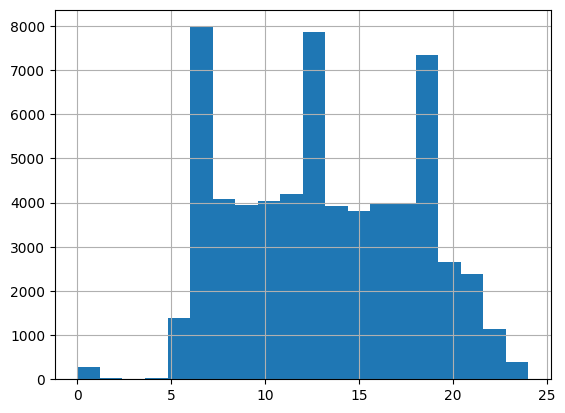

In [55]:
X['DepTime_Hour'].hist(bins=20)

По оси (x) - часы вылета (0–23).

По оси (y) - количество рейсов, которые вылетают в этот час.

<Axes: >

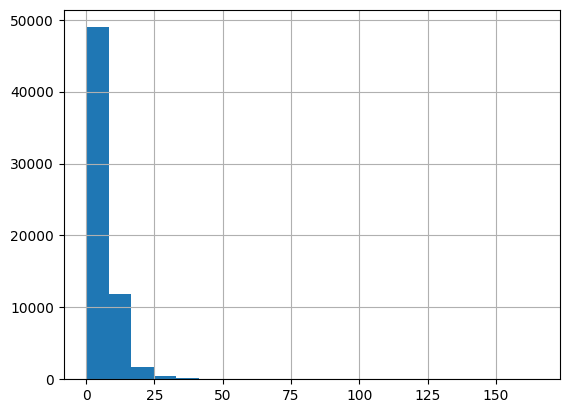

In [36]:
X['TaxiIn'].hist(bins=20)

TaxiIn - время в минутах, которое самолёт проводит, катясь по рулёжным дорожкам от полосы приземления до гейта.

Это вещественный числовой признак.

Ось X - длительность руления (в минутах).

Ось Y - количество рейсов с таким временем руления.

<Axes: >

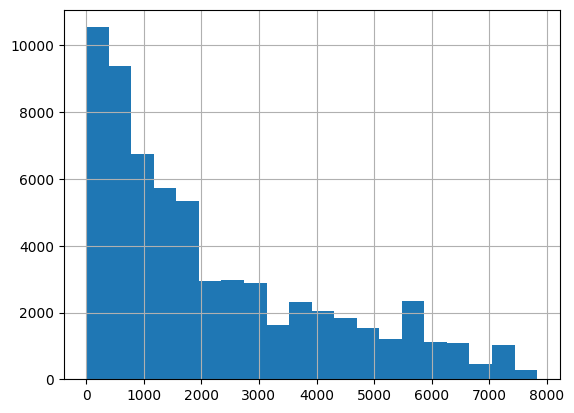

In [37]:
X['FlightNum'].hist(bins=20)

FlightNum - это уникальный номер рейса авиакомпании.

Он числовой, но не является вещественным признаком в математическом смысле: числа просто обозначают рейсы, а не количественные величины.

Ось X - номера рейсов (в виде чисел).

Ось Y - количество рейсов, попавших в каждый интервал.

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

признаки с большими числами будут доминировать при обучении модели, а маленькие признаки почти не влияют на веса линейной регрессии.

В линейной модели это может исказить коэффициенты и ухудшить качество предсказаний.

Масштабирование приводит все числовые признаки к приблизительно одинаковому масштабу

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [56]:
def transform_data(data):
    # Your code here
    df = data.copy() # копия данных, чтобы не изменять исходный DataFrame
    # выбираем числовые признаки
    numeric = df.select_dtypes(include=['int64', 'float64'])
    # заменяем все пропуски на 0
    df[numeric.columns] = numeric.fillna(0) 
    scaler = StandardScaler() # масштабируем числовые признаки
    df[numeric.columns] = scaler.fit_transform(df[numeric.columns])

# выбираем категориальные признаки, те строки
# Пропуски заменяем на 'nan'
# Применяем OneHot кодирование, 
# те каждая категория превращается в отдельный столбец с 0 и 1
    categorical = df.select_dtypes(include=['object'])
    df[categorical.columns] = categorical.fillna('nan')
    df_encoded = pd.get_dummies(df[categorical.columns])

# объединяем масштабированные числовые признаки и закодированные категориальные
    df_final = pd.concat([df[numeric.columns], df_encoded], axis=1)

    return df_final


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [39]:
# Your code here
from sklearn.preprocessing import StandardScaler

X_transformed = transform_data(X)
X_transformed.shape[1]

631

числовые признаки заполняются нулями и масштабируются;

категориальные признаки заполняются 'nan' и кодируются в формате one-hot

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [57]:
# Your code here
from sklearn.model_selection import train_test_split
# разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, 
    y,              
    test_size=0.3,  
    # 30% данных уйдут в контрольную выборку, 70% останется для обучения
    random_state=42 
)
X_train.shape, X_test.shape # размеры выборок

((44382, 631), (19022, 631))

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [58]:
# Your code here
# используем только первые 1000 строк обучающей выборки
X_small = X_train[:1000]
y_small = y_train[:1000]

model = LinearRegression() # создаём модель линейной регрессии
model.fit(X_small, y_small) # обучаем модель на небольшой выборке

y_pred_train = model.predict(X_small) # предсказания для обучающей подвыборки
y_pred_test = model.predict(X_test) # предсказания для тестовой выборки

mse_train = mean_squared_error(y_small, y_pred_train) # среднеквадратичная ошибка
# чем меньше, тем лучше модель подгоняет данные
mse_test = mean_squared_error(y_test, y_pred_test) 

r2_train = r2_score(y_small, y_pred_train) # коэффициент детерминации
r2_test = r2_score(y_test, y_pred_test)

print("MSE на обучении:", mse_train)
print("MSE на тесте:", mse_test)
print("R^2 на обучении:", r2_train)
print("R^2 на тесте:", r2_test)

print("Коэффициенты модели:", model.coef_)

MSE на обучении: 640.8839752320393
MSE на тесте: 1502.0790193213393
R^2 на обучении: 0.3952878900958152
R^2 на тесте: -0.1229078795699079
Коэффициенты модели: [-7.27232754e-01  5.72736170e-01  8.28429064e-01  5.16108159e-01
 -7.02362567e+00  8.14674748e+00  4.11247998e-01  4.55336914e+00
 -2.87769808e-13 -1.17157898e+00  2.22978913e+01  1.28501016e+00
 -1.37925768e+01 -1.75853761e+00 -1.31144034e+01  5.43412222e+00
 -1.46105350e-13 -1.22956940e+00  5.85692907e+00  1.71079837e+01
 -2.59771034e+00  2.09742790e+00  1.32242686e+01 -1.12538821e+01
 -1.37804221e+01 -7.82863119e+00 -1.30592126e+01  1.70825740e+01
  2.21622426e+00  8.61305668e+00 -3.80555272e+00  4.09888789e+00
 -7.51510021e+00 -1.54699018e+00 -7.46069873e-14  1.38242817e+02
 -2.42999165e+00  2.60981270e+01 -1.55431223e-14 -1.13686838e-13
 -6.90095872e+01 -2.84217094e-14 -6.99440506e-14  2.84217094e-14
 -1.77635684e-14  2.35367281e-14  1.77635684e-15 -1.34291111e+01
 -3.01980663e-14  7.99360578e-15 -1.90518289e+01  2.86264024e

На обучающей выборке модель объясняет 39.5 % разброса целевой переменной.

На тестовой выборке отрицательный. Значит, что модель предсказывает хуже, чем просто среднее значение.

MSE на тесте в несколько раз больше, чем на обучении. Значит модель переобучилась.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
# список значений параметра регуляризации
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

print("Lasso:") # Lasso регуляризация
for a in alphas:  
    score = cross_val_score(Lasso(alpha=a), X_train[:1000], y_train[:1000], cv=3, scoring='r2').mean()
    print(f"alpha={a}: R²={score:.3f}")
# для каждого альфа мы создаём модель Lasso(alpha=a) и оцениваем её качество
# из обучающих данных берётся только первые 1000 наблюдений (строк)
# cross_val_score - функция для кросс-валидации. Делит данные на cv (здесь 3) частей,
# 3 раза обучает и тестирует модель на разных частях данных.
# метрика R² показывает, насколько хорошо модель объясняет дисперсию данных.

Lasso:
alpha=0.001: R²=-0.675
alpha=0.01: R²=-0.534
alpha=0.1: R²=-0.195
alpha=1: R²=0.041
alpha=10: R²=-0.008
alpha=100: R²=-0.008


In [44]:
print("\nRidge:")
for a in alphas:
    score = cross_val_score(Ridge(alpha=a), X_train[:1000], y_train[:1000], cv=3, scoring='r2').mean()
    print(f"alpha={a}: R²={score:.3f}")


Ridge:
alpha=0.001: R²=-0.696
alpha=0.01: R²=-0.683
alpha=0.1: R²=-0.581
alpha=1: R²=-0.285
alpha=10: R²=-0.022
alpha=100: R²=0.041


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

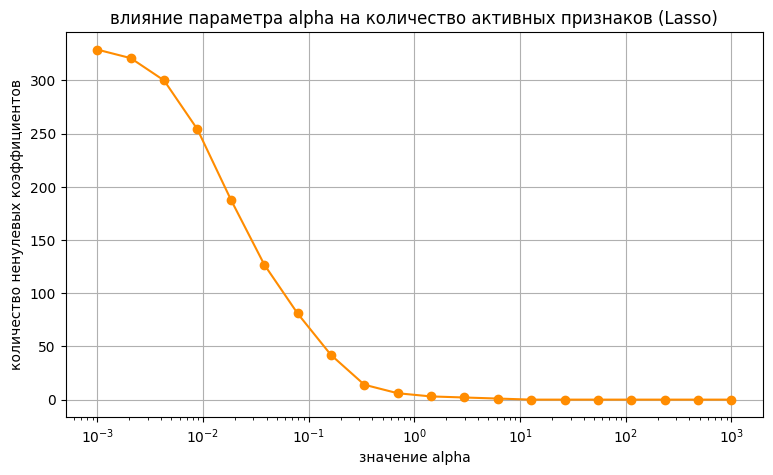

In [ ]:
# Your code here
# ...
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

alpha_values = np.logspace(-3, 3, 20) # диапазон alpha: от 0.001 до 1000
active_features = []

for a in alpha_values: # проверка как Lasso обнуляет коэффициенты при разных alpha
    model = Lasso(alpha=a, max_iter=5000) 
    #5000 - увеличиваем число итераций, чтобы модель точно успела сойтись
    model.fit(X_train[:1000], y_train[:1000]) 
    # обучаем на первых 1000 строках обучающей выборки

# считаем количество ненулевых коэффициентов
    non_zero = np.count_nonzero(np.abs(model.coef_) > 1e-3)
    active_features.append(non_zero) # добавляем в список кол. активных признаков

plt.figure(figsize=(9, 5))
plt.plot(alpha_values, active_features, marker='o', color='darkorange')
plt.xscale('log')
plt.title('влияние параметра alpha на количество активных признаков (Lasso)')
plt.xlabel('значение аlpha')
plt.ylabel('количество ненулевых коэффициентов')
plt.grid(True)
plt.show()


Это график зависимости числа активных (ненулевых) признаков от силы регуляризации α в Lasso-регрессии.

Ось X - значение параметра регуляризации alpha
(чем больше alpha, тем сильнее регуляризация).

Ось Y - количество активных признаков,те признаков, у которых коэффициент не равен нулю после обучения.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [61]:
# Your code here
# ...
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
ridge = Ridge() # обучение Ridge-регрессию (L2)
ridge.fit(X_train, y_train) # модель обучается на тренировочной выборке

y_pred_train = ridge.predict(X_train) # предсказываем на обучении и тесте
y_pred_test = ridge.predict(X_test)

# среднеквадратичная ошибка 
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test)) # счет метрики
mae = mean_absolute_error(y_test, y_pred_test) # средняя абсолютная ошибка
r2 = r2_score(y_test, y_pred_test) # коэффициент детерминации

print("Ridge Regression результаты:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

Ridge Regression результаты:
RMSE: 34.781
MAE: 17.851
R²: 0.096


Ridge-регрессия сгладила переобучение и дала более стабильный результат, чем обычная линейная модель

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Your code here
# ...

In [ ]:
alphas = np.logspace(-3, 3, 20)
# создаем логарифмическую сетку из 20 значений alpha от 0.001 до 1000 для перебора
param_grid = {'alpha': alphas}
# создаем словарь параметров для GridSearchCV, 
# который будет проверять разные значения alpha

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# инициализируем кв с 5 фолдами, 
# перемешиваем данные и фиксируем random_state для воспроизводимости
grid = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_squared_error')# создаем объект GridSearchCV
# он будет подбирать лучший альфа для Ridge по среднеквадратичной ошибке
grid.fit(X_train[:1000], y_train[:1000])
# обучаем на первых 1000 объектах обучающей выборки


print(f"Лучший alpha: {grid.best_params_['alpha']:.3f}")

Лучший alpha: 112.884


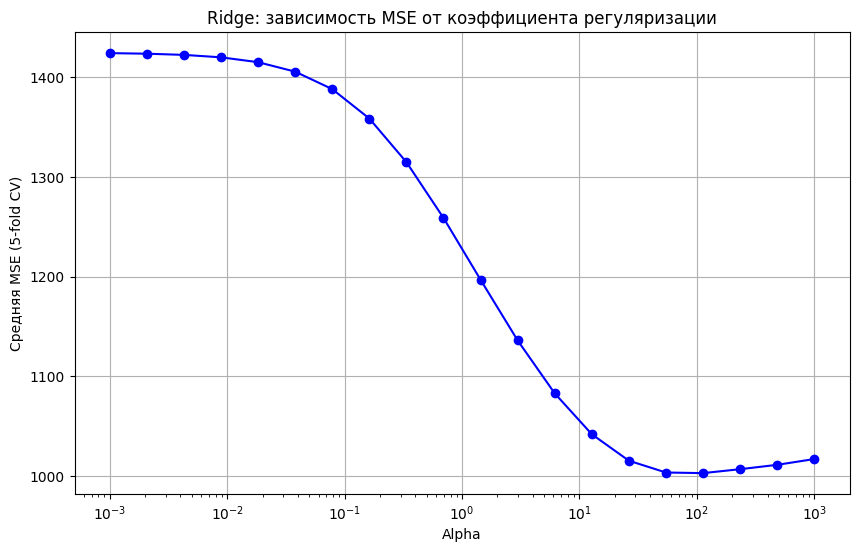

In [70]:
# сохраняем все результаты GridSearchCV, включая средние значения MSE для каждого alpha
results = grid.cv_results_ 
plt.figure(figsize=(10, 6))
plt.plot(alphas, -results['mean_test_score'], 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Средняя MSE (5-fold CV)')
plt.title('Ridge: зависимость MSE от коэффициента регуляризации')
plt.grid(True)
plt.show()

 график показывает, как изменяется средняя ошибка при разных значениях alpha



In [71]:

best_alpha = grid.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha) # создаем Ridge-регрессию с найденным лучшим alpha
best_ridge.fit(X_train[:1000], y_train[:1000])
y_pred_best = best_ridge.predict(X_test)

# 
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best)) # счет метрики
mae = mean_absolute_error(y_test, y_pred_best) # средняя абсолютная ошибка
r2 = r2_score(y_test, y_pred_best) # коэффициент детерминации

print("\nМетрики Ridge с подобранным alpha:")
print(f"RMSE: {rmse:.1f} минут")
print(f"MAE: {mae:.1f} минут")
print(f"R²: {r2:.3f}")



Метрики Ridge с подобранным alpha:
RMSE: 35.5 минут
MAE: 18.4 минут
R²: 0.059


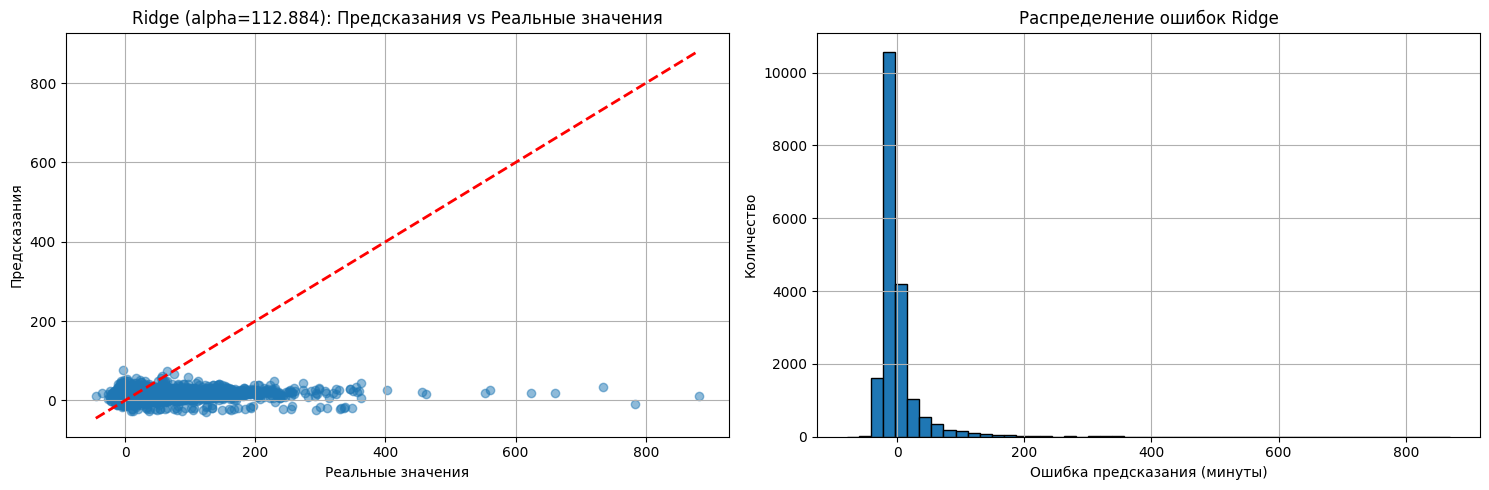

In [72]:
# два подграфика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(y_test, y_pred_best, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# добавляем диагональ, чтобы видеть совпадение предсказаний и реальных значений
ax1.set_xlabel('Реальные значения')
ax1.set_ylabel('Предсказания')
ax1.set_title(f'Ridge (alpha={best_alpha:.3f}): Предсказания vs Реальные значения')
ax1.grid(True)

# считаем ошибки предсказания
errors = y_test - y_pred_best
ax2.hist(errors, bins=50, edgecolor='black')
ax2.set_xlabel('Ошибка предсказания (минуты)')
ax2.set_ylabel('Количество')
ax2.set_title('Распределение ошибок Ridge')
ax2.grid(True)
# гистограмма показывает, как часто модель ошибается на определенное количество минут
plt.tight_layout()
plt.show()

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

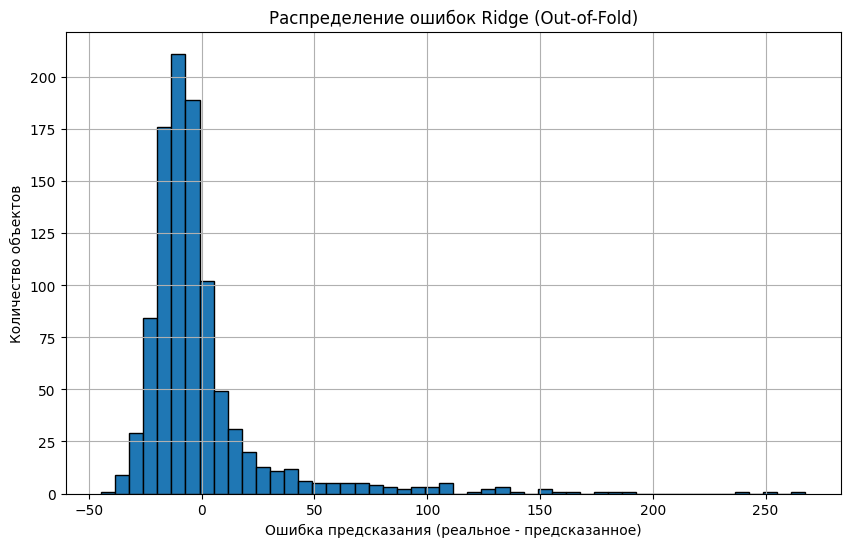

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=best_alpha)

# делаем out-of-fold предсказания для обучения с кв
# каждая часть данных предсказывается моделью, которая не видела эту часть
y_oof_pred = cross_val_predict(ridge, X_train[:1000], y_train[:1000], cv=5)

# считаем ошибки предсказания для OOF 
# вычисляем отклонения между реальными и предсказанными значениями
errors = y_train[:1000] - y_oof_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel("Ошибка предсказания (реальное - предсказанное)")
plt.ylabel("Количество объектов")
plt.title("Распределение ошибок Ridge (Out-of-Fold)")
plt.grid(True)
plt.show()

# гистограмма показывает распределение ошибок на обучающей выборке

In [74]:
# статистика ошибок
print(f"Средняя ошибка: {np.mean(errors):.2f}")
print(f"Стандартное отклонение ошибок: {np.std(errors):.2f}")
print(f"Максимальная ошибка: {np.max(errors):.2f}")
print(f"Минимальная ошибка: {np.min(errors):.2f}")

Средняя ошибка: -0.02
Стандартное отклонение ошибок: 31.53
Максимальная ошибка: 267.68
Минимальная ошибка: -44.68
